<a href="https://colab.research.google.com/github/mewadashreya/Market_basket_Optimization/blob/main/Market_basket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install squarify # treemaps
!pip install networkx #network diagram i.e graph


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import squarify
import seaborn as sns
import networkx as nx
import matplotlib.cm as cm

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Market_Basket_Optimisation.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7501, 20)

In [6]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

In [7]:
df.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
910,butter,mint green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2846,escalope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3298,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5488,mineral water,milk,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5897,turkey,red wine,tomatoes,spaghetti,meatballs,milk,almonds,green tea,energy drink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4327,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2599,spaghetti,french wine,fromage blanc,cereals,carrots,cottage cheese,yogurt cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6835,white wine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2998,ham,ground beef,mineral water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,chocolate,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [9]:
df.values

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., nan, nan, nan],
       ['chutney', nan, nan, ..., nan, nan, nan],
       ...,
       ['chicken', nan, nan, ..., nan, nan, nan],
       ['escalope', 'green tea', nan, ..., nan, nan, nan],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., nan, nan, nan]],
      dtype=object)

Removing Nan Values:

In [10]:
df_new = [] # remove kari nan values 
            # eni word cloud banayu biju
for i in range(len(df)):
  df_new.append([str(df.values[i,j]) for j in range(0,20) if str(df.values[i,j])!='nan'])

In [11]:
new_str = str(df[0:1])

In [12]:
new_str

'       0        1        2   ...               17       18         19\n0  shrimp  almonds  avocado  ...  frozen smoothie  spinach  olive oil\n\n[1 rows x 20 columns]'

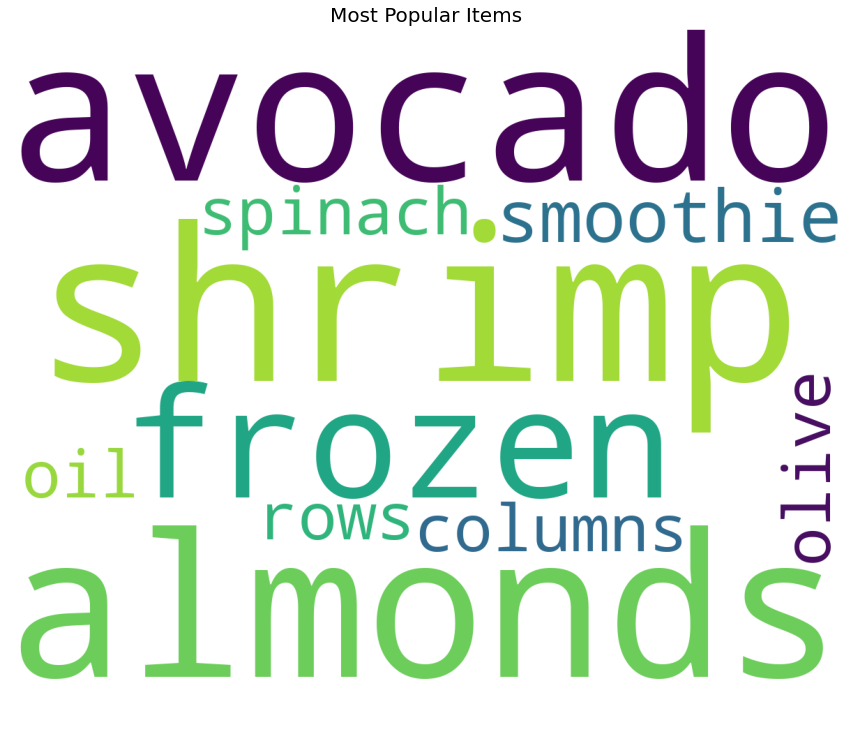

In [13]:
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color="white",width=1200,height=1000,max_words=200).generate(new_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [14]:
new_str_1 = str(df_new[0:])

In [15]:
new_str_1

"[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra 

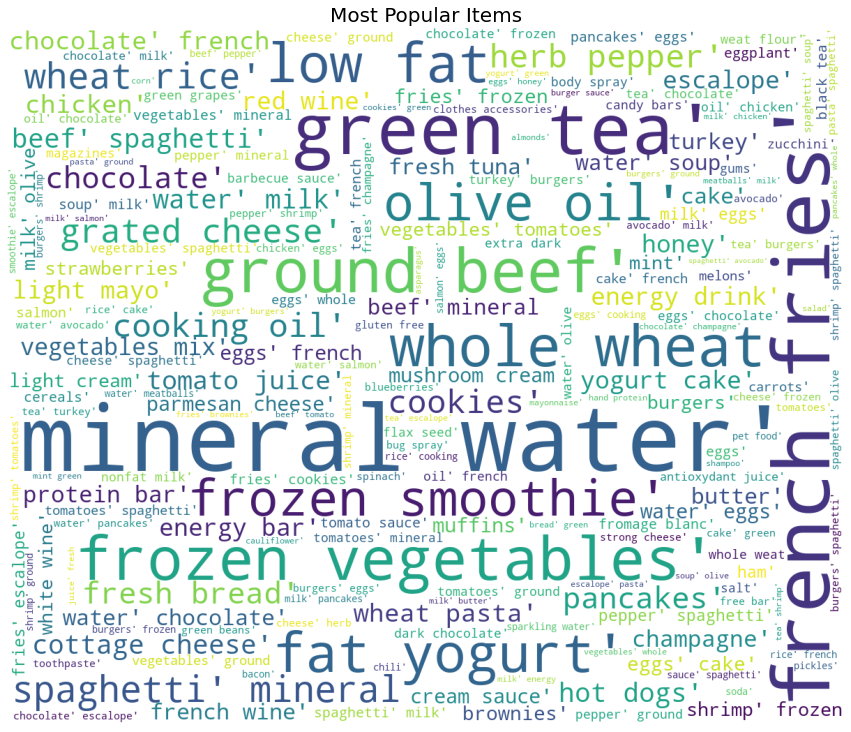

In [16]:
plt.rcParams['figure.figsize'] = (15,15)
wordcloud = WordCloud(background_color="white",width=1200,height=1000,max_words=200).generate(new_str_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Most Popular Items',fontsize = 20)
plt.show()

In [17]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import seaborn as sns

In [19]:
df[0].value_counts().head(40)

mineral water        577
burgers              576
turkey               458
chocolate            391
frozen vegetables    373
spaghetti            354
shrimp               325
grated cheese        293
eggs                 279
cookies              270
french fries         244
herb & pepper        232
ground beef          218
tomatoes             212
milk                 181
escalope             143
fresh tuna           129
red wine             123
ham                  120
cake                  98
green tea             97
whole wheat pasta     95
pancakes              80
soup                  78
muffins               69
energy bar            67
olive oil             67
champagne             64
pepper                61
avocado               57
butter                52
parmesan cheese       51
whole wheat rice      47
low fat yogurt        46
chicken               44
vegetables mix        39
pickles               38
meatballs             33
frozen smoothie       32
yogurt cake           31


In [20]:
# df[0].value_counts().head(40).sns.barplot(palette="Blues_d")

In [21]:
# plt.rcParams['figure.figsize'] = (15,15)
# color = plt.cm.cividis_r(np.linspace(0, 1, 40))
# y = data[0].value_counts().head(50).to_frame().head(40).plot.bar(color=color)
# plt.title('frequency of most popular items', fontsize = 20)
# plt.show()

In [22]:
y = df[0].value_counts().head(50).to_frame()

In [23]:
print(y)

                     0
mineral water      577
burgers            576
turkey             458
chocolate          391
frozen vegetables  373
spaghetti          354
shrimp             325
grated cheese      293
eggs               279
cookies            270
french fries       244
herb & pepper      232
ground beef        218
tomatoes           212
milk               181
escalope           143
fresh tuna         129
red wine           123
ham                120
cake                98
green tea           97
whole wheat pasta   95
pancakes            80
soup                78
muffins             69
energy bar          67
olive oil           67
champagne           64
pepper              61
avocado             57
butter              52
parmesan cheese     51
whole wheat rice    47
low fat yogurt      46
chicken             44
vegetables mix      39
pickles             38
meatballs           33
frozen smoothie     32
yogurt cake         31
salmon              29
dessert wine        28
hot dogs   

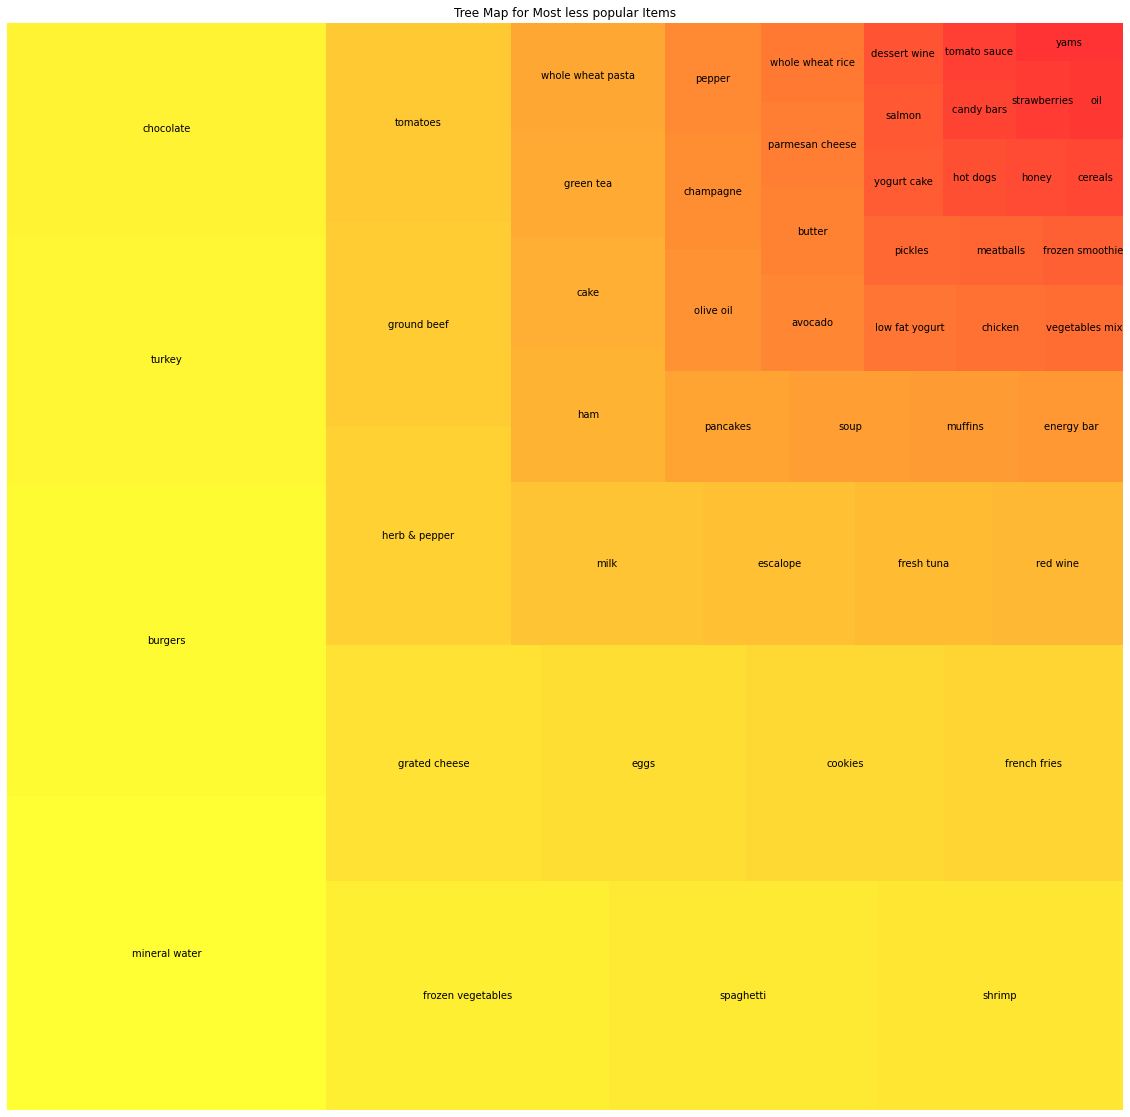

In [24]:
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.autumn_r(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values,label = y.index,alpha=0.8,color=color)
plt.title('Tree Map for Most less popular Items')
plt.axis("Off")
plt.show()

In [25]:
top_40 = df[0].value_counts().rename_axis('unique_values').reset_index(name='counts')
print(top_40)

         unique_values  counts
0        mineral water     577
1              burgers     576
2               turkey     458
3            chocolate     391
4    frozen vegetables     373
..                 ...     ...
110         body spray       1
111               corn       1
112            shampoo       1
113            oatmeal       1
114              cream       1

[115 rows x 2 columns]


In [26]:
print(top_40)

         unique_values  counts
0        mineral water     577
1              burgers     576
2               turkey     458
3            chocolate     391
4    frozen vegetables     373
..                 ...     ...
110         body spray       1
111               corn       1
112            shampoo       1
113            oatmeal       1
114              cream       1

[115 rows x 2 columns]


In [27]:
df['food'] = 'Food' #navu column banaty
food = df.truncate(before = -1, after = 15) #truncate kari kaya colunms thi value jove che 
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

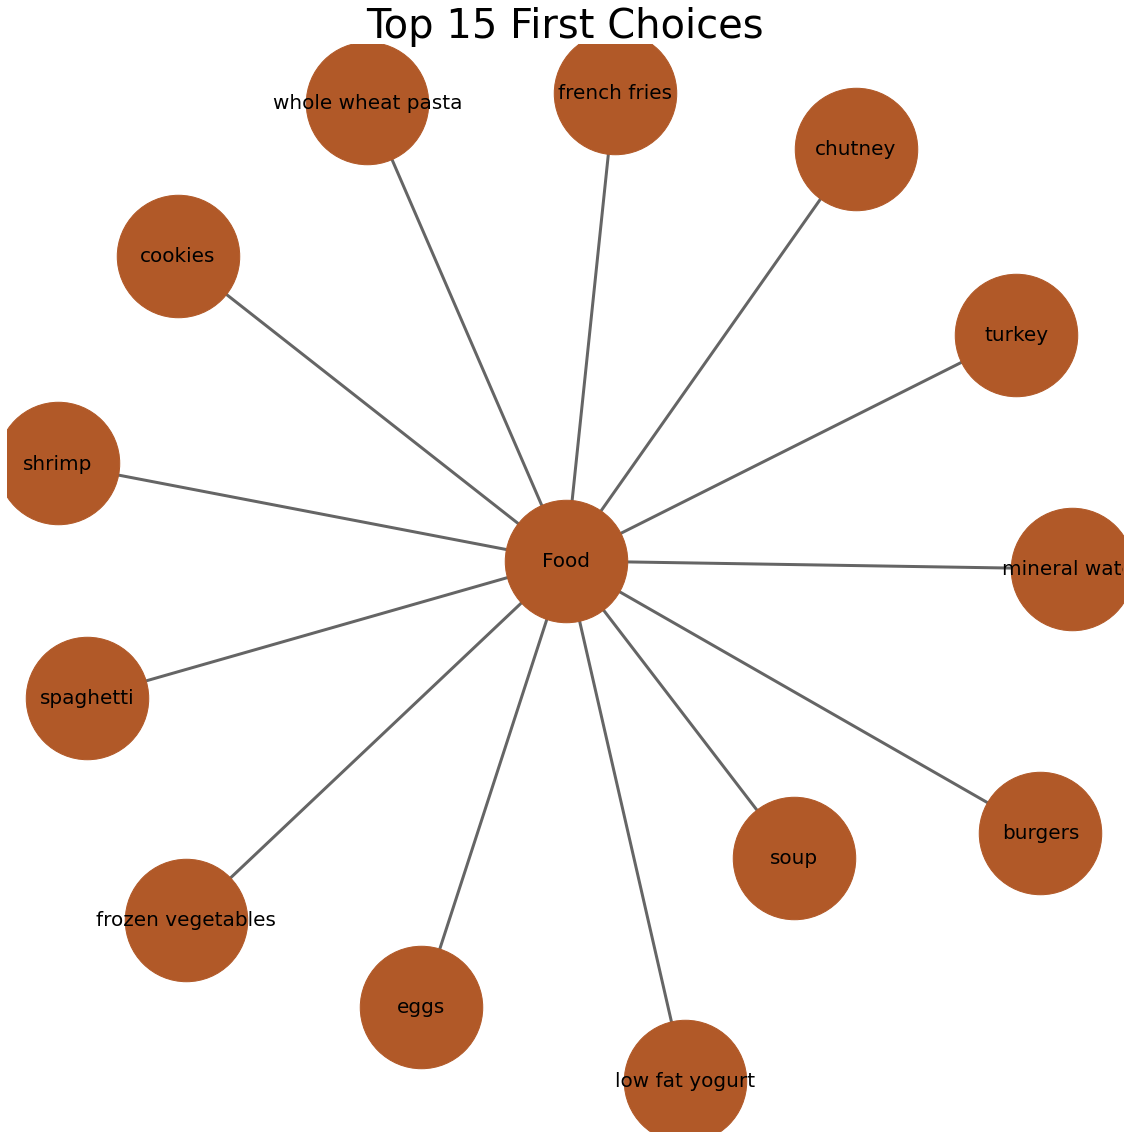

In [28]:
plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Paired_r(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [29]:
df['secondchoice'] = 'Second Choice'

In [30]:
secondchoice = df.truncate(before=-1,after=15)
secondchoice = nx.from_pandas_edgelist(secondchoice,source='food',target=1,edge_attr=True)

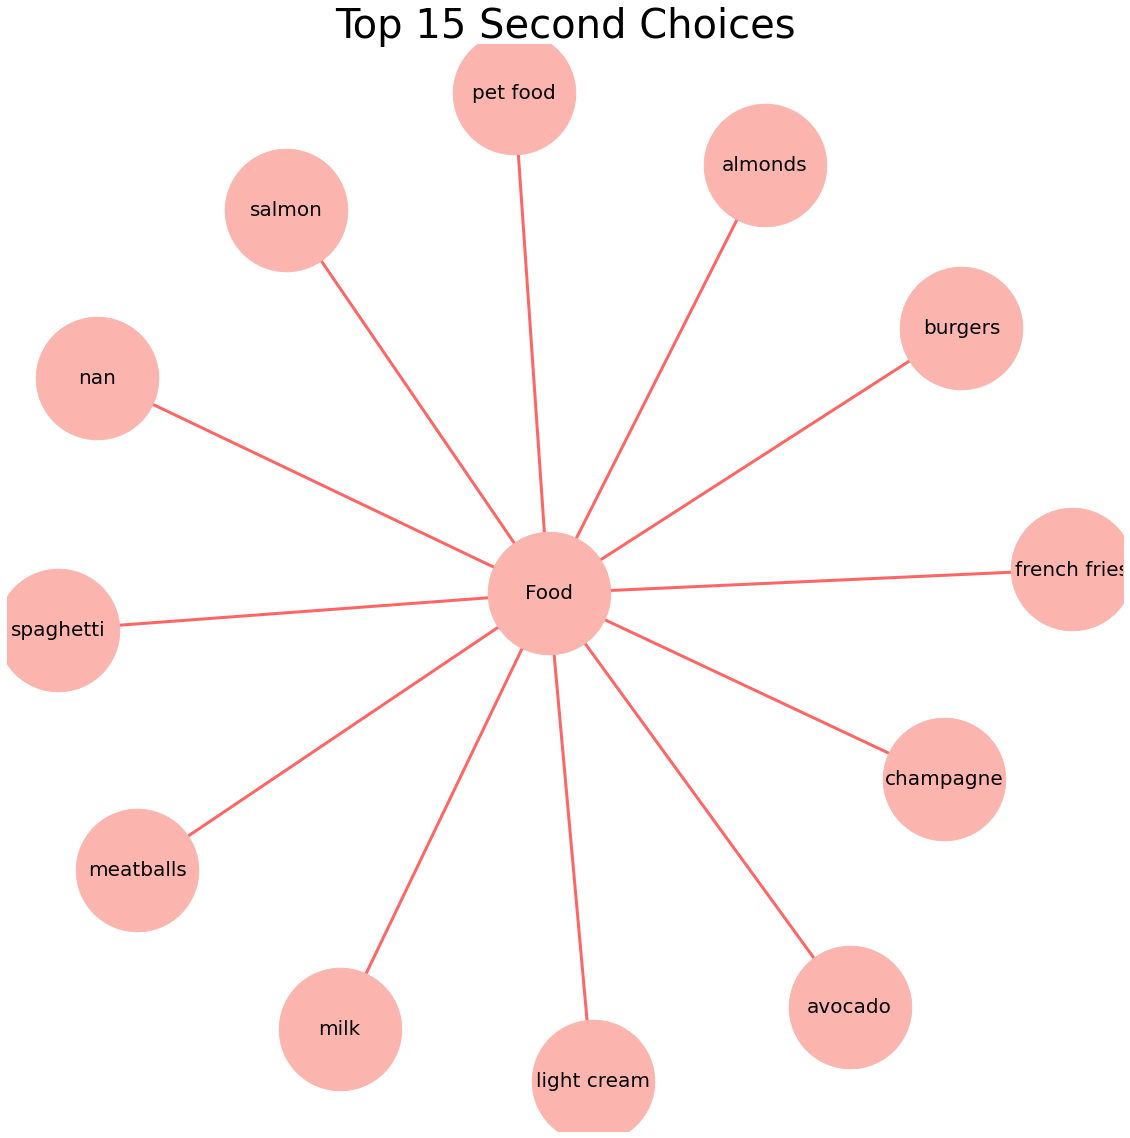

In [31]:
plt.rcParams['figure.figsize'] =(20,20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Pastel1(np.linspace(0,15,1))
nx.draw_networkx_nodes(secondchoice,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(secondchoice,pos,width=3,alpha=0.6,edge_color='red')
nx.draw_networkx_labels(secondchoice,pos,font_size=20,font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [32]:
# df['thirdchoice']

In [33]:
# df['thirdchoice'] = 'Third Choice'
# df.drop(columns=['Thirdchoice'])
thirdchoice = df.truncate(before=-1,after=10)
thirdchoice = nx.from_pandas_edgelist(thirdchoice,source='food',target=2,edge_attr=True)

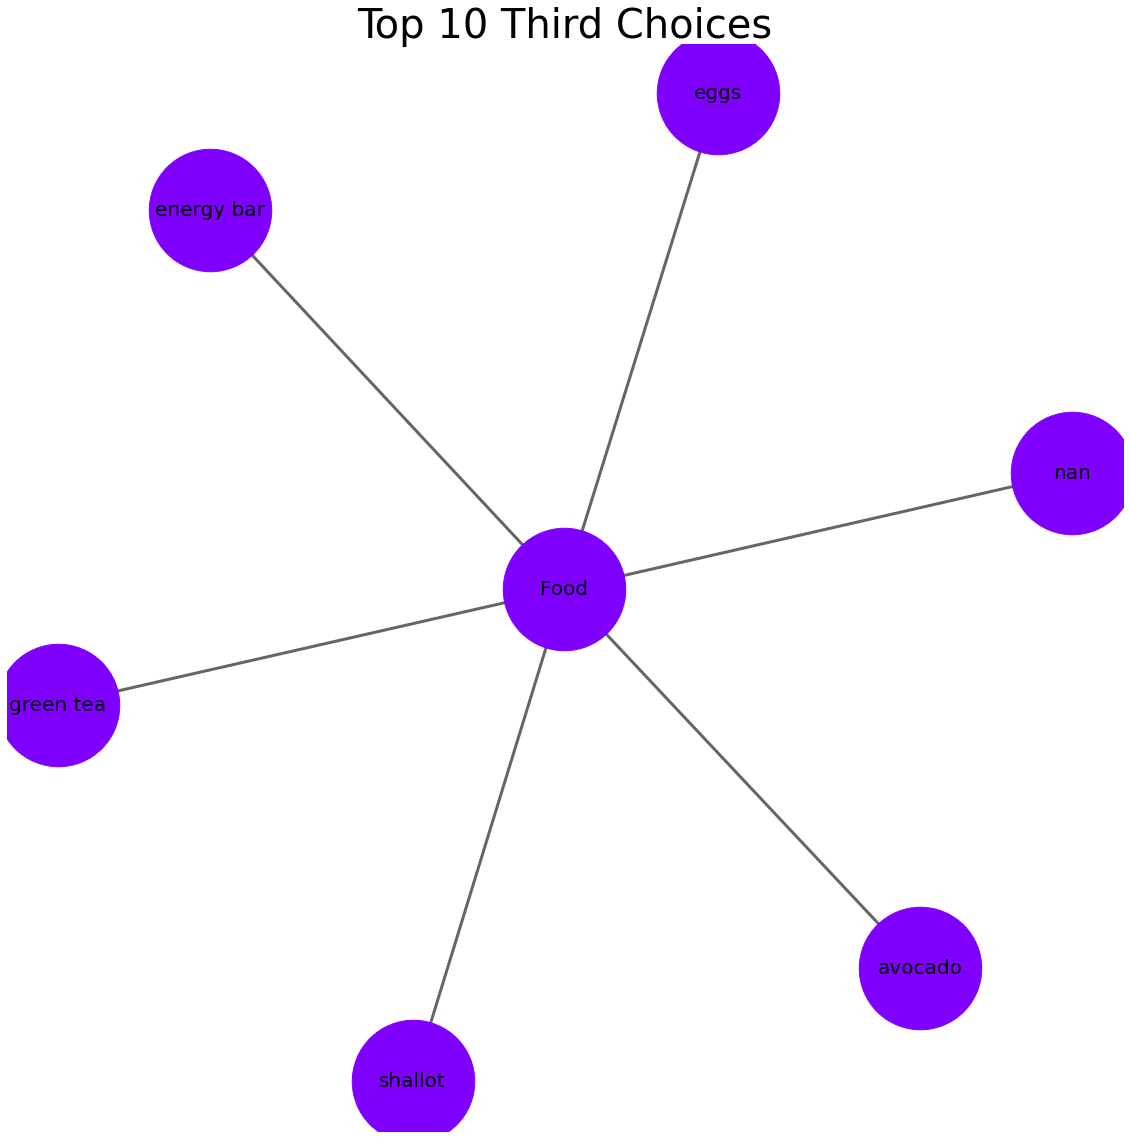

In [34]:
plt.rcParams['figure.figsize'] =(20,20)
pos = nx.spring_layout(thirdchoice)
color = plt.cm.rainbow(np.linspace(0,15,1))
nx.draw_networkx_nodes(thirdchoice,pos,node_size=15000,node_color=color)
nx.draw_networkx_edges(thirdchoice,pos,width=3,alpha=0.6,edge_color='black')
nx.draw_networkx_labels(thirdchoice,pos,font_size=20,font_family='sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 10 Third Choices', fontsize = 40)
plt.show()

In [35]:
T = []
for i in range(0,7501):
  T.append([str(df.values[i,j]) for j in range(0,20)])

In [36]:
T = np.array(T)

In [37]:
T.shape

(7501, 20)

In [38]:
print(T)

[['shrimp' 'almonds' 'avocado' ... 'frozen smoothie' 'spinach'
  'olive oil']
 ['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['chicken' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['escalope' 'green tea' 'nan' ... 'nan' 'nan' 'nan']
 ['eggs' 'frozen smoothie' 'yogurt cake' ... 'nan' 'nan' 'nan']]


In [39]:
from mlxtend.preprocessing import TransactionEncoder

In [40]:
te = TransactionEncoder()

In [41]:
df = te.fit_transform(T)

In [42]:
te.columns_

[' asparagus',
 'almonds',
 'antioxydant juice',
 'asparagus',
 'avocado',
 'babies food',
 'bacon',
 'barbecue sauce',
 'black tea',
 'blueberries',
 'body spray',
 'bramble',
 'brownies',
 'bug spray',
 'burger sauce',
 'burgers',
 'butter',
 'cake',
 'candy bars',
 'carrots',
 'cauliflower',
 'cereals',
 'champagne',
 'chicken',
 'chili',
 'chocolate',
 'chocolate bread',
 'chutney',
 'cider',
 'clothes accessories',
 'cookies',
 'cooking oil',
 'corn',
 'cottage cheese',
 'cream',
 'dessert wine',
 'eggplant',
 'eggs',
 'energy bar',
 'energy drink',
 'escalope',
 'extra dark chocolate',
 'flax seed',
 'french fries',
 'french wine',
 'fresh bread',
 'fresh tuna',
 'fromage blanc',
 'frozen smoothie',
 'frozen vegetables',
 'gluten free bar',
 'grated cheese',
 'green beans',
 'green grapes',
 'green tea',
 'ground beef',
 'gums',
 'ham',
 'hand protein bar',
 'herb & pepper',
 'honey',
 'hot dogs',
 'ketchup',
 'light cream',
 'light mayo',
 'low fat yogurt',
 'magazines',
 'mashe

In [43]:
df = pd.DataFrame(df,columns = te.columns_)

In [44]:
df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [45]:
y # aa y ei che jyaa aapde olu treemap bamayu


,0
mineral water,577
burgers,576
turkey,458
chocolate,391
frozen vegetables,373
spaghetti,354
shrimp,325
grated cheese,293
eggs,279
cookies,270


In [46]:
df = df.loc[:,list(y.index)] #121 features saathe lidhu htt toh bovjj messy thattt etle top50 lidha 

In [53]:
df.shape

(7501, 50)

In [54]:
from mlxtend.frequent_patterns import apriori, association_rules

In [64]:

frequent_itemsets = apriori(df,min_support=0.05,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [73]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,1
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,1
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,1
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,1
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,1
5,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,1
